In [ ]:
import pandas as pd
import numpy as np
import random 
import gym
from trd_env import trading_env

In [6]:
test = pd.read_csv("btc_6H_(2016-2018).csv")
env = trading_env(test)
env.reset()

array([0.45, 0.5 , 0.  , 0.5 ])

In [7]:
obs_state = []
for i in set(test["3D_return_norm"]):
    for m in set(test["MACD_status"]):
        for r in set(test["RSI_status"]):
            for e in set(test["RSI_status"]):
                obs_state.append(np.array([i,m,r,e]))

In [8]:
q_table = {}
for i in obs_state:
    q_table[f"{i}"]=[0,0,0]

In [20]:
#Q-learning parameters
epsilon = 0.98
max_epsilon = 1
min_epsilon = 0.1
decay_rate = 0.01
learning_rate = 0.6 #learning rate
gamma = 0.96 # discount factor

total_episodes = 1000
max_steps = len(test)-1

In [21]:

total_reward = []
total_reward_perc =[]
total_bought = []
total_sold = []

for episode in range(total_episodes):
    env.reset()
    current_state = env.observation()
    print(f"Current Episode: {episode}")
    total_steps = 0
    current_reward = []
    for step in range(max_steps):
        exp = random.uniform(0,1)
        if exp > epsilon:
            action = np.argmax(q_table[f"{current_state}"])
        else:
            action = np.random.choice([0,1,2])
        
        new_state,reward,done = env.step(action)
        q_table[f"{current_state}"][action] = q_table[f"{current_state}"][action] + learning_rate * (reward + gamma * np.max(q_table[f"{new_state}"]) - q_table[f"{current_state}"][action])
        
        current_state = new_state
        total_steps+= 1
        if done == True:
            break
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    
    print(env.render())
    return_perc,return_value,bought,sold = env.reward_output()
    total_reward.append(return_value)
    total_reward_perc.append(return_perc)
    total_bought.append(bought)
    total_sold.append(sold)
### Current issue is algorithm is only buying but not selling 
## Possibly because environment terminates too early

Current Episode: 0
Current Porfolio Value:25267.473810414805; Available Capital: 5885.104937950828; Current Stocks Held: 5.4868510811059625
No. Stocks Bought:299.97375992173204; No. Stocks Sold:294.48690993062615; Average Cost:3604.5509898524115 
Return:252.67473810414805%; 15267.473810414805
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:19123.198491985557; Available Capital: 14941.655221499586; Current Stocks Held: 1.1820566342582615
No. Stocks Bought:237.5014260789772; No. Stocks Sold:236.3193705347187; Average Cost:3622.211533835378 
Return:191.23198491985556%; 9123.198491985557
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:17118.620846782072; Available Capital: 16030.072371874467; Current Stocks Held: 0.30709825939401125
No. Stocks Bought:231.57342625932623; No. Stocks Sold:231.26632908993247; Average Cost:3981.5116697689105 
Return:171.18620846782073%; 7118.6208467820725
Termination date: 2018-12-09 18:0

Current Porfolio Value:18539.026532565847; Available Capital: 9174.782244652057; Current Stocks Held: 2.648100538926415
No. Stocks Bought:225.60140037795318; No. Stocks Sold:222.95330092902668; Average Cost:3795.738206847561 
Return:185.39026532565848%; 8539.026532565847
Termination date: 2018-12-09 18:00:00
None
Current Episode: 28
Current Porfolio Value:23956.420975291796; Available Capital: 5010.262507724399; Current Stocks Held: 5.349547981760485
No. Stocks Bought:263.34123756359793; No. Stocks Sold:257.9916906718375; Average Cost:3818.158660054038 
Return:239.56420975291795%; 13956.420975291796
Termination date: 2018-12-09 18:00:00
None
Current Episode: 29
Current Porfolio Value:20619.159876359303; Available Capital: 10484.734001650766; Current Stocks Held: 2.8626862744806476
No. Stocks Bought:255.58785936651898; No. Stocks Sold:252.72517418203873; Average Cost:3855.3639905287346 
Return:206.19159876359302%; 10619.159876359303
Termination date: 2018-12-09 18:00:00
None
Current Epi

Current Porfolio Value:26751.14135182636; Available Capital: 5728.914091353661; Current Stocks Held: 5.917322461586581
No. Stocks Bought:284.7381756817642; No. Stocks Sold:278.8208543101777; Average Cost:3726.806481212191 
Return:267.5114135182636%; 16751.14135182636
Termination date: 2018-12-09 18:00:00
None
Current Episode: 53
Current Porfolio Value:24809.444859499683; Available Capital: 10002.697718825884; Current Stocks Held: 4.164458073746843
No. Stocks Bought:275.33155887596973; No. Stocks Sold:271.1671018922228; Average Cost:3671.7016076075765 
Return:248.09444859499683%; 14809.444859499683
Termination date: 2018-12-09 18:00:00
None
Current Episode: 54
Current Porfolio Value:31365.58884514051; Available Capital: 15798.892179161841; Current Stocks Held: 4.39532135830833
No. Stocks Bought:326.61670887737455; No. Stocks Sold:322.2213886090662; Average Cost:3599.6066514052486 
Return:313.65588845140513%; 21365.58884514051
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5

Current Porfolio Value:19078.77857409734; Available Capital: 4493.140769343074; Current Stocks Held: 4.124890022975358
No. Stocks Bought:262.82283133153675; No. Stocks Sold:258.6979423985618; Average Cost:4190.938970795965 
Return:190.78778574097342%; 9078.778574097341
Termination date: 2018-12-09 18:00:00
None
Current Episode: 78
Current Porfolio Value:27045.72289584001; Available Capital: 4496.622801844804; Current Stocks Held: 6.363409451843792
No. Stocks Bought:300.25810239783647; No. Stocks Sold:293.894694035993; Average Cost:3707.6143730780545 
Return:270.4572289584001%; 17045.72289584001
Termination date: 2018-12-09 18:00:00
None
Current Episode: 79
Current Porfolio Value:40081.69292108969; Available Capital: 23787.311705294356; Current Stocks Held: 4.582450134685468
No. Stocks Bought:338.45581318815; No. Stocks Sold:333.8733641434647; Average Cost:3583.303684965101 
Return:400.81692921089694%; 30081.692921089692
Termination date: 2018-12-09 18:00:00
None
Current Episode: 80
Cur

Current Porfolio Value:29599.58130018357; Available Capital: 3944.1131162744236; Current Stocks Held: 7.240453913060084
No. Stocks Bought:286.7735570931963; No. Stocks Sold:279.5331042701364; Average Cost:4180.829247958253 
Return:295.9958130018357%; 19599.58130018357
Termination date: 2018-12-09 18:00:00
None
Current Episode: 105
Current Porfolio Value:22545.293513697477; Available Capital: 2750.141141140655; Current Stocks Held: 5.567778731625497
No. Stocks Bought:271.47746207300503; No. Stocks Sold:265.9096844313795; Average Cost:4153.096253900514 
Return:225.4529351369748%; 12545.293513697477
Termination date: 2018-12-09 18:00:00
None
Current Episode: 106
Current Porfolio Value:20760.255824001764; Available Capital: 1480.379526316317; Current Stocks Held: 5.455190273491728
No. Stocks Bought:259.3906458343898; No. Stocks Sold:253.935456650898; Average Cost:3661.8008314862254 
Return:207.60255824001766%; 10760.255824001764
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1

Current Porfolio Value:18679.048991123527; Available Capital: 9407.217050932977; Current Stocks Held: 2.6224978513662105
No. Stocks Bought:230.16700046474287; No. Stocks Sold:227.54450370337688; Average Cost:3998.4589848661954 
Return:186.79048991123528%; 8679.048991123527
Termination date: 2018-12-09 18:00:00
None
Current Episode: 131
Current Porfolio Value:25114.61425745889; Available Capital: 8567.929107948745; Current Stocks Held: 4.665343751695479
No. Stocks Bought:274.77863892963376; No. Stocks Sold:270.1132962679384; Average Cost:3476.2887213885983 
Return:251.1461425745889%; 15114.614257458888
Termination date: 2018-12-09 18:00:00
None
Current Episode: 132
Current Porfolio Value:21823.77519529246; Available Capital: 4594.924961844952; Current Stocks Held: 4.845239529839182
No. Stocks Bought:231.37179841585584; No. Stocks Sold:226.52655997601678; Average Cost:3665.9848410108193 
Return:218.2377519529246%; 11823.77519529246
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:26919.406128300638; Available Capital: 198.52863064242615; Current Stocks Held: 7.559870303799015
No. Stocks Bought:297.6027648104786; No. Stocks Sold:290.0428955966792; Average Cost:4253.909753146185 
Return:269.19406128300636%; 16919.406128300638
Termination date: 2018-12-09 18:00:00
None
Current Episode: 156
Current Porfolio Value:31306.353591887622; Available Capital: 394.71021415360843; Current Stocks Held: 8.731450468103656
No. Stocks Bought:307.8010800355468; No. Stocks Sold:299.0696306574435; Average Cost:3958.35177804383 
Return:313.0635359188762%; 21306.353591887622
Termination date: 2018-12-09 18:00:00
None
Current Episode: 157
Current Porfolio Value:20597.83608671047; Available Capital: 579.6563923550693; Current Stocks Held: 5.630798265671921
No. Stocks Bought:265.3774563916009; No. Stocks Sold:259.74665921592924; Average Cost:4087.7320388569515 
Return:205.97836086710473%; 10597.836086710471
Termination date: 2018-12-09 18:00:00
None
Current Episode

Current Porfolio Value:23927.012920073365; Available Capital: 96.13803189659848; Current Stocks Held: 6.740527096550592
No. Stocks Bought:276.3426828257812; No. Stocks Sold:269.6021568192305; Average Cost:4955.123757902783 
Return:239.27012920073363%; 13927.012920073365
Termination date: 2018-12-09 18:00:00
None
Current Episode: 182
Current Porfolio Value:33765.73349305744; Available Capital: 5484.123192025963; Current Stocks Held: 7.983238020213319
No. Stocks Bought:295.00783337623346; No. Stocks Sold:287.02459644601987; Average Cost:4025.8688033865837 
Return:337.65733493057445%; 23765.733493057443
Termination date: 2018-12-09 18:00:00
None
Current Episode: 183
Current Porfolio Value:18486.50385698186; Available Capital: 381.89683610959366; Current Stocks Held: 5.126812897323401
No. Stocks Bought:249.73130387631824; No. Stocks Sold:244.604492068995; Average Cost:4277.59709179032 
Return:184.8650385698186%; 8486.50385698186
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1

Current Porfolio Value:17438.77235068186; Available Capital: 3845.2278249001715; Current Stocks Held: 3.8265709983153346
No. Stocks Bought:234.7641899412961; No. Stocks Sold:230.93762003298085; Average Cost:4815.361844026681 
Return:174.3877235068186%; 7438.772350681858
Termination date: 2018-12-09 18:00:00
None
Current Episode: 208
Current Porfolio Value:30397.105798224504; Available Capital: 8579.548775735126; Current Stocks Held: 6.15350282065424
No. Stocks Bought:280.14871844637884; No. Stocks Sold:273.99521671572506; Average Cost:4316.406945713723 
Return:303.97105798224504%; 20397.105798224504
Termination date: 2018-12-09 18:00:00
None
Current Episode: 209
Current Porfolio Value:34542.57882278228; Available Capital: 10401.766367232993; Current Stocks Held: 6.795019543344075
No. Stocks Bought:288.00854385182134; No. Stocks Sold:281.21352539847726; Average Cost:4189.275932868683 
Return:345.4257882278228%; 24542.578822782278
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:22316.835312929416; Available Capital: 971.5328480205287; Current Stocks Held: 6.027519619894671
No. Stocks Bought:246.1533060936777; No. Stocks Sold:240.12578756378343; Average Cost:3812.302614773607 
Return:223.16835312929416%; 12316.835312929416
Termination date: 2018-12-09 18:00:00
None
Current Episode: 234
Current Porfolio Value:21296.00433028407; Available Capital: 66.77167932388753; Current Stocks Held: 5.977528878590221
No. Stocks Bought:242.49854571500262; No. Stocks Sold:236.5210179264121; Average Cost:4407.643472811382 
Return:212.96004330284072%; 11296.004330284071
Termination date: 2018-12-09 18:00:00
None
Current Episode: 235
Current Porfolio Value:31031.875923176915; Available Capital: 87.20080416051778; Current Stocks Held: 8.728903236003372
No. Stocks Bought:321.94040667789636; No. Stocks Sold:313.21150453189256; Average Cost:4503.201322519529 
Return:310.31875923176915%; 21031.875923176915
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:24522.610927325695; Available Capital: 4365.665711569794; Current Stocks Held: 5.694209942396471
No. Stocks Bought:258.31106898622807; No. Stocks Sold:252.61686013383152; Average Cost:4008.176865362495 
Return:245.22610927325695%; 14522.610927325695
Termination date: 2018-12-09 18:00:00
None
Current Episode: 259
Current Porfolio Value:24773.039383786; Available Capital: 6048.47843342732; Current Stocks Held: 5.30051584657211
No. Stocks Bought:242.55195414622102; No. Stocks Sold:237.25143938964888; Average Cost:4245.915780056366 
Return:247.73039383785996%; 14773.039383786
Termination date: 2018-12-09 18:00:00
None
Current Episode: 260
Current Porfolio Value:47893.11217371111; Available Capital: 26634.544250938154; Current Stocks Held: 6.008116711674466
No. Stocks Bought:401.39179855298426; No. Stocks Sold:395.38368293130986; Average Cost:3883.37301457324 
Return:478.9311217371111%; 37893.11217371111
Termination date: 2018-12-09 18:00:00
None
Current Episode: 261


Current Porfolio Value:13789.477609776333; Available Capital: 3293.490606962001; Current Stocks Held: 2.9635250696979565
No. Stocks Bought:184.05903634610146; No. Stocks Sold:181.09551236640357; Average Cost:5860.681853409012 
Return:137.89477609776333%; 3789.4776097763333
Termination date: 2018-12-09 18:00:00
None
Current Episode: 284
Current Porfolio Value:31564.46149300528; Available Capital: 7879.512923530165; Current Stocks Held: 6.672235412352154
No. Stocks Bought:246.62307828848384; No. Stocks Sold:239.95084396613169; Average Cost:4604.568672708437 
Return:315.64461493005285%; 21564.46149300528
Termination date: 2018-12-09 18:00:00
None
Current Episode: 285
Current Porfolio Value:28265.972024660674; Available Capital: 7640.448191431575; Current Stocks Held: 5.8295942647336645
No. Stocks Bought:269.58386607486364; No. Stocks Sold:263.75427290013; Average Cost:4443.398215404573 
Return:282.65972024660675%; 18265.972024660674
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:24339.68305705599; Available Capital: 4776.877498531405; Current Stocks Held: 5.52277141434513
No. Stocks Bought:276.4311055539815; No. Stocks Sold:270.9083352296364; Average Cost:4748.116997523969 
Return:243.39683057055993%; 14339.68305705599
Termination date: 2018-12-09 18:00:00
None
Current Episode: 309
Current Porfolio Value:25624.519654744454; Available Capital: 34.08697277940771; Current Stocks Held: 7.2198833717915445
No. Stocks Bought:262.03162926059935; No. Stocks Sold:254.81174697880778; Average Cost:4905.865940228253 
Return:256.24519654744455%; 15624.519654744454
Termination date: 2018-12-09 18:00:00
None
Current Episode: 310
Current Porfolio Value:29900.040142698715; Available Capital: 8785.560022040643; Current Stocks Held: 5.952550001403578
No. Stocks Bought:279.821105787202; No. Stocks Sold:273.868556875798; Average Cost:4741.952010563729 
Return:299.00040142698714%; 19900.040142698715
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3

Current Porfolio Value:20285.44129835704; Available Capital: 2430.093106250545; Current Stocks Held: 5.052008401505874
No. Stocks Bought:244.93790068392528; No. Stocks Sold:239.88589337241967; Average Cost:4152.424850435287 
Return:202.8544129835704%; 10285.44129835704
Termination date: 2018-12-09 18:00:00
None
Current Episode: 334
Current Porfolio Value:27435.980252830283; Available Capital: 3856.0584209523104; Current Stocks Held: 6.659783886389047
No. Stocks Bought:244.65201432302817; No. Stocks Sold:237.99223152663896; Average Cost:5024.032209171088 
Return:274.3598025283028%; 17435.980252830283
Termination date: 2018-12-09 18:00:00
None
Current Episode: 335
Current Porfolio Value:16776.820597825033; Available Capital: 7.70478203838916; Current Stocks Held: 4.722033369771265
No. Stocks Bought:221.81153939230705; No. Stocks Sold:217.08950711253587; Average Cost:6232.496850384342 
Return:167.76820597825034%; 6776.8205978250335
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:49709.81632595798; Available Capital: 6059.411800388171; Current Stocks Held: 12.359672236706649
No. Stocks Bought:392.4164381930166; No. Stocks Sold:380.05676704631003; Average Cost:4493.181145683592 
Return:497.0981632595798%; 39709.81632595798
Termination date: 2018-12-09 18:00:00
None
Current Episode: 359
Current Porfolio Value:53436.70711981582; Available Capital: 19146.168121519946; Current Stocks Held: 9.664185053172835
No. Stocks Bought:392.6376286064025; No. Stocks Sold:382.97344464323; Average Cost:3619.138526406132 
Return:534.3670711981582%; 43436.70711981582
Termination date: 2018-12-09 18:00:00
None
Current Episode: 360
Current Porfolio Value:19619.1364673605; Available Capital: 667.2603040429318; Current Stocks Held: 5.362714823731977
No. Stocks Bought:215.76974712446926; No. Stocks Sold:210.4070333907371; Average Cost:3935.827812212839 
Return:196.191364673605%; 9619.136467360499
Termination date: 2018-12-09 18:00:00
None
Current Episode: 361
Curr

Current Porfolio Value:21752.320913094503; Available Capital: 2120.5340554950817; Current Stocks Held: 5.5468922678230825
No. Stocks Bought:209.95501685324942; No. Stocks Sold:204.4081256754264; Average Cost:4707.949346311858 
Return:217.52320913094505%; 11752.320913094503
Termination date: 2018-12-09 18:00:00
None
Current Episode: 384
Current Porfolio Value:20850.053411671954; Available Capital: 2339.2878253709528; Current Stocks Held: 5.212479602607135
No. Stocks Bought:204.2536766173741; No. Stocks Sold:199.04119810476692; Average Cost:4286.344689169308 
Return:208.5005341167195%; 10850.053411671954
Termination date: 2018-12-09 18:00:00
None
Current Episode: 385
Current Porfolio Value:22897.728112785535; Available Capital: 3683.217302480774; Current Stocks Held: 5.4385076404903465
No. Stocks Bought:279.9361346176519; No. Stocks Sold:274.497628067161; Average Cost:4147.871960206942 
Return:228.97728112785535%; 12897.728112785535
Termination date: 2018-12-09 18:00:00
None
Current Epis

Current Porfolio Value:38419.18557006518; Available Capital: 11172.396400977746; Current Stocks Held: 7.708336241804179
No. Stocks Bought:328.5010546027255; No. Stocks Sold:320.792719450921; Average Cost:3838.0313669945726 
Return:384.1918557006518%; 28419.18557006518
Termination date: 2018-12-09 18:00:00
None
Current Episode: 409
Current Porfolio Value:25869.604606148372; Available Capital: 3037.3042033961897; Current Stocks Held: 6.448487745326278
No. Stocks Bought:269.95877790071677; No. Stocks Sold:263.5102912453906; Average Cost:4416.613632055456 
Return:258.69604606148374%; 15869.604606148372
Termination date: 2018-12-09 18:00:00
None
Current Episode: 410
Current Porfolio Value:23318.91594225035; Available Capital: 182.03870782688506; Current Stocks Held: 6.507325940469553
No. Stocks Bought:263.56070558808057; No. Stocks Sold:257.05338073761135; Average Cost:5137.765404920803 
Return:233.1891594225035%; 13318.91594225035
Termination date: 2018-12-09 18:00:00
None
Current Episode:

Current Porfolio Value:21571.182753899106; Available Capital: 3381.0478131766163; Current Stocks Held: 5.134508402053968
No. Stocks Bought:228.08527207062158; No. Stocks Sold:222.9507647585677; Average Cost:5439.104076061644 
Return:215.71182753899106%; 11571.182753899106
Termination date: 2018-12-09 18:00:00
None
Current Episode: 434
Current Porfolio Value:19009.64128070087; Available Capital: 3.005378931618156e-05; Current Stocks Held: 5.385272016648821
No. Stocks Bought:220.22398653530297; No. Stocks Sold:214.83871560865427; Average Cost:6366.060827953739 
Return:190.0964128070087%; 9009.641280700871
Termination date: 2018-12-09 18:00:00
None
Current Episode: 435
Current Porfolio Value:25696.347589944213; Available Capital: 920.4520082322302; Current Stocks Held: 6.969270850436341
No. Stocks Bought:243.93160238649793; No. Stocks Sold:236.96233262606103; Average Cost:4662.545692920414 
Return:256.96347589944213%; 15696.347589944213
Termination date: 2018-12-09 18:00:00
None
Current E

Current Porfolio Value:17654.372367291886; Available Capital: 246.89757172252672; Current Stocks Held: 4.915606659254542
No. Stocks Bought:201.7362738618614; No. Stocks Sold:196.82066829260688; Average Cost:4979.171536347545 
Return:176.54372367291887%; 7654.372367291886
Termination date: 2018-12-09 18:00:00
None
Current Episode: 460
Current Porfolio Value:26958.457963861834; Available Capital: 3825.4732735606813; Current Stocks Held: 6.517272435152352
No. Stocks Bought:213.30835521769794; No. Stocks Sold:206.79108387254544; Average Cost:4407.569196545336 
Return:269.5845796386183%; 16958.457963861834
Termination date: 2018-12-09 18:00:00
None
Current Episode: 461
Current Porfolio Value:34858.39130059183; Available Capital: 1185.1883747720576; Current Stocks Held: 9.50579327284401
No. Stocks Bought:246.21487656478305; No. Stocks Sold:236.7090843819392; Average Cost:4295.297986088191 
Return:348.5839130059183%; 24858.39130059183
Termination date: 2018-12-09 18:00:00
None
Current Episode

Current Porfolio Value:20031.641159126968; Available Capital: 973.0999478238507; Current Stocks Held: 5.370660637062364
No. Stocks Bought:212.8259259196365; No. Stocks Sold:207.45526637257427; Average Cost:4025.0264268537026 
Return:200.31641159126968%; 10031.641159126968
Termination date: 2018-12-09 18:00:00
None
Current Episode: 485
Current Porfolio Value:22666.499517932003; Available Capital: 5709.517845469429; Current Stocks Held: 4.7809140724337436
No. Stocks Bought:230.33315485535744; No. Stocks Sold:225.55224187292356; Average Cost:4983.883007288173 
Return:226.66499517932004%; 12666.499517932003
Termination date: 2018-12-09 18:00:00
None
Current Episode: 486
Current Porfolio Value:27589.19928378202; Available Capital: 726.8348395237954; Current Stocks Held: 7.557392244000064
No. Stocks Bought:258.9209346994199; No. Stocks Sold:251.3635435454198; Average Cost:4092.3563730101964 
Return:275.8919928378202%; 17589.19928378202
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:29882.15306156502; Available Capital: 9841.339256818894; Current Stocks Held: 5.65427370433318
No. Stocks Bought:284.16189410121; No. Stocks Sold:278.5076214868767; Average Cost:3736.8724325577296 
Return:298.8215306156502%; 19882.15306156502
Termination date: 2018-12-09 18:00:00
None
Current Episode: 510
Current Porfolio Value:23007.038506137797; Available Capital: 3510.0667525879708; Current Stocks Held: 5.506305324182344
No. Stocks Bought:251.5420286906606; No. Stocks Sold:246.0357244564781; Average Cost:3814.96414387824 
Return:230.07038506137798%; 13007.038506137797
Termination date: 2018-12-09 18:00:00
None
Current Episode: 511
Current Porfolio Value:27599.929971712452; Available Capital: 5472.6490379642255; Current Stocks Held: 6.264895592288569
No. Stocks Bought:286.5040834754926; No. Stocks Sold:280.2391889732041; Average Cost:3688.255556068261 
Return:275.99929971712453%; 17599.929971712452
Termination date: 2018-12-09 18:00:00
None
Current Episode: 512

Current Porfolio Value:22080.15777991096; Available Capital: 7883.859100868191; Current Stocks Held: 3.9945706894628787
No. Stocks Bought:219.24479115292422; No. Stocks Sold:215.25022155346122; Average Cost:5454.381878187049 
Return:220.80157779910957%; 12080.157779910958
Termination date: 2018-12-09 18:00:00
None
Current Episode: 535
Current Porfolio Value:26608.925051610142; Available Capital: 5093.674519233234; Current Stocks Held: 6.08873459696908
No. Stocks Bought:263.9029626939703; No. Stocks Sold:257.8142291870015; Average Cost:4788.417777954268 
Return:266.08925051610146%; 16608.925051610142
Termination date: 2018-12-09 18:00:00
None
Current Episode: 536
Current Porfolio Value:35691.99093300374; Available Capital: 4952.129834901493; Current Stocks Held: 8.655851458738551
No. Stocks Bought:283.5098913964137; No. Stocks Sold:274.85404102767524; Average Cost:4266.699259085914 
Return:356.9199093300374%; 25691.99093300374
Termination date: 2018-12-09 18:00:00
None
Current Episode: 

Current Porfolio Value:17355.210402430803; Available Capital: 4526.977634008111; Current Stocks Held: 3.6150650420234762
No. Stocks Bought:224.91205211763244; No. Stocks Sold:221.29698816560906; Average Cost:4025.364409129189 
Return:173.55210402430802%; 7355.210402430803
Termination date: 2018-12-09 18:00:00
None
Current Episode: 560
Current Porfolio Value:28397.390767187906; Available Capital: 6638.822887159873; Current Stocks Held: 6.1221676858768594
No. Stocks Bought:264.6332942148138; No. Stocks Sold:258.51112761893677; Average Cost:4226.58465273303 
Return:283.9739076718791%; 18397.390767187906
Termination date: 2018-12-09 18:00:00
None
Current Episode: 561
Current Porfolio Value:17672.493708107377; Available Capital: 2804.0284549641715; Current Stocks Held: 4.192041323585502
No. Stocks Bought:228.57341556518224; No. Stocks Sold:224.38137533159718; Average Cost:4241.9048412238835 
Return:176.72493708107376%; 7672.493708107377
Termination date: 2018-12-09 18:00:00
None
Current Epi

Current Porfolio Value:34695.90459236841; Available Capital: 4433.693565437841; Current Stocks Held: 8.571713500589745
No. Stocks Bought:286.4942563056607; No. Stocks Sold:277.9225438950709; Average Cost:4216.546095440306 
Return:346.95904592368413%; 24695.90459236841
Termination date: 2018-12-09 18:00:00
None
Current Episode: 585
Current Porfolio Value:33554.551569070114; Available Capital: 3779.365355104457; Current Stocks Held: 8.404935997279718
No. Stocks Bought:294.8436442212204; No. Stocks Sold:286.4387093139411; Average Cost:4735.245940915245 
Return:335.54551569070117%; 23554.551569070114
Termination date: 2018-12-09 18:00:00
None
Current Episode: 586
Current Porfolio Value:22879.349748179062; Available Capital: 8257.298412511347; Current Stocks Held: 4.122244057408667
No. Stocks Bought:261.72268780712955; No. Stocks Sold:257.60044483972104; Average Cost:4157.546621715091 
Return:228.79349748179064%; 12879.349748179062
Termination date: 2018-12-09 18:00:00
None
Current Episode:

Current Porfolio Value:25917.26439006805; Available Capital: 33.03370777651074; Current Stocks Held: 7.279649760779076
No. Stocks Bought:252.13751822365862; No. Stocks Sold:244.85786955287907; Average Cost:4232.063743831196 
Return:259.17264390068044%; 15917.264390068049
Termination date: 2018-12-09 18:00:00
None
Current Episode: 610
Current Porfolio Value:42320.453651585485; Available Capital: 11165.081051843372; Current Stocks Held: 8.812313407993486
No. Stocks Bought:370.513139168586; No. Stocks Sold:361.7008268505921; Average Cost:3510.126679233133 
Return:423.2045365158548%; 32320.453651585485
Termination date: 2018-12-09 18:00:00
None
Current Episode: 611
Current Porfolio Value:31398.34927944365; Available Capital: 1186.919552423315; Current Stocks Held: 8.503418883473579
No. Stocks Bought:337.792944731209; No. Stocks Sold:329.28952693773545; Average Cost:3874.363183064434 
Return:313.9834927944365%; 21398.34927944365
Termination date: 2018-12-09 18:00:00
None
Current Episode: 61

Current Porfolio Value:23042.428440404634; Available Capital: 2357.43712759351; Current Stocks Held: 5.8540084412971884
No. Stocks Bought:206.66600189164546; No. Stocks Sold:200.81199454034834; Average Cost:4943.28524067317 
Return:230.42428440404632%; 13042.428440404634
Termination date: 2018-12-09 18:00:00
None
Current Episode: 636
Current Porfolio Value:25052.285381811515; Available Capital: 57.20533918313694; Current Stocks Held: 7.066980406972731
No. Stocks Bought:262.1406136136234; No. Stocks Sold:255.07363429665025; Average Cost:5437.770862767168 
Return:250.52285381811515%; 15052.285381811515
Termination date: 2018-12-09 18:00:00
None
Current Episode: 637
Current Porfolio Value:26932.209175825883; Available Capital: 1151.7034595960681; Current Stocks Held: 7.297576789711875
No. Stocks Bought:260.5884139315423; No. Stocks Sold:253.29083823183038; Average Cost:4267.908916455332 
Return:269.3220917582588%; 16932.209175825883
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:18843.468054146848; Available Capital: 4871.847598595658; Current Stocks Held: 3.933973865930631
No. Stocks Bought:209.57390582570395; No. Stocks Sold:205.6399330497733; Average Cost:4695.404563521962 
Return:188.43468054146848%; 8843.468054146848
Termination date: 2018-12-09 18:00:00
None
Current Episode: 661
Current Porfolio Value:19155.39317092391; Available Capital: 6826.027584160427; Current Stocks Held: 3.4882416669558616
No. Stocks Bought:224.89966006672472; No. Stocks Sold:221.41141948976914; Average Cost:4591.958206350952 
Return:191.55393170923912%; 9155.393170923911
Termination date: 2018-12-09 18:00:00
None
Current Episode: 662
Current Porfolio Value:32542.652781607794; Available Capital: 4288.0612916443115; Current Stocks Held: 7.964231859412243
No. Stocks Bought:265.1612967108057; No. Stocks Sold:257.197065941393; Average Cost:4059.8154771596724 
Return:325.42652781607796%; 22542.652781607794
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:22589.11871352647; Available Capital: 2886.927016606509; Current Stocks Held: 5.547716828820325
No. Stocks Bought:262.6844277642798; No. Stocks Sold:257.1367120254594; Average Cost:4484.769525772822 
Return:225.8911871352647%; 12589.11871352647
Termination date: 2018-12-09 18:00:00
None
Current Episode: 686
Current Porfolio Value:30671.321651135808; Available Capital: 11048.604842117267; Current Stocks Held: 5.527576963248976
No. Stocks Bought:301.4757464384651; No. Stocks Sold:295.94817056521606; Average Cost:4210.518426702268 
Return:306.71321651135804%; 20671.321651135808
Termination date: 2018-12-09 18:00:00
None
Current Episode: 687
Current Porfolio Value:17393.735936331763; Available Capital: 3012.584946552012; Current Stocks Held: 4.059422401289133
No. Stocks Bought:249.34978659740176; No. Stocks Sold:245.29036528611294; Average Cost:4664.833552987614 
Return:173.93735936331763%; 7393.735936331763
Termination date: 2018-12-09 18:00:00
None
Current Episode:

Current Porfolio Value:21901.467850976176; Available Capital: 1.7068124368820938; Current Stocks Held: 6.201620805788762
No. Stocks Bought:280.497119328935; No. Stocks Sold:274.2954996131468; Average Cost:4512.774277179205 
Return:219.01467850976175%; 11901.467850976176
Termination date: 2018-12-09 18:00:00
None
Current Episode: 711
Current Porfolio Value:32744.257945472884; Available Capital: 8371.655937559839; Current Stocks Held: 6.891029746070638
No. Stocks Bought:266.5965479883468; No. Stocks Sold:259.7055193322764; Average Cost:4314.976465448441 
Return:327.44257945472884%; 22744.257945472884
Termination date: 2018-12-09 18:00:00
None
Current Episode: 712
Current Porfolio Value:27494.11859622919; Available Capital: 5604.9016083274; Current Stocks Held: 6.18887599830686
No. Stocks Bought:299.74134407419825; No. Stocks Sold:293.5524691658916; Average Cost:4852.819101505214 
Return:274.9411859622919%; 17494.11859622919
Termination date: 2018-12-09 18:00:00
None
Current Episode: 713


Current Porfolio Value:38928.6038775456; Available Capital: 8484.237080658148; Current Stocks Held: 8.604747661084968
No. Stocks Bought:345.69539332887837; No. Stocks Sold:337.0906467577931; Average Cost:3941.1355597340707 
Return:389.286038775456%; 28928.603877545604
Termination date: 2018-12-09 18:00:00
None
Current Episode: 736
Current Porfolio Value:20327.169126891866; Available Capital: 675.9043574322357; Current Stocks Held: 5.564347528256427
No. Stocks Bought:237.9139114483426; No. Stocks Sold:232.3495650100861; Average Cost:3988.7709306125 
Return:203.27169126891866%; 10327.169126891866
Termination date: 2018-12-09 18:00:00
None
Current Episode: 737
Current Porfolio Value:28375.382029230517; Available Capital: 271.8874935630537; Current Stocks Held: 7.961826804710804
No. Stocks Bought:255.16673729185192; No. Stocks Sold:247.2049115771412; Average Cost:4126.178180766298 
Return:283.75382029230514%; 18375.382029230517
Termination date: 2018-12-09 18:00:00
None
Current Episode: 73

Current Porfolio Value:32752.274895135764; Available Capital: 4837.195459668945; Current Stocks Held: 7.892577079121594
No. Stocks Bought:267.253875433905; No. Stocks Sold:259.36129944478347; Average Cost:3768.4204755752316 
Return:327.52274895135764%; 22752.274895135764
Termination date: 2018-12-09 18:00:00
None
Current Episode: 761
Current Porfolio Value:19004.65792760844; Available Capital: 2.773335545582082; Current Stocks Held: 5.3600979309562735
No. Stocks Bought:209.53611068230128; No. Stocks Sold:204.176013841345; Average Cost:4513.941031739675 
Return:190.0465792760844%; 9004.657927608441
Termination date: 2018-12-09 18:00:00
None
Current Episode: 762
Current Porfolio Value:25647.376555421728; Available Capital: 289.4728176286759; Current Stocks Held: 7.15196837578291
No. Stocks Bought:270.19603892596757; No. Stocks Sold:263.0440716401847; Average Cost:4975.26917428285 
Return:256.47376555421727%; 15647.376555421728
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7

Current Porfolio Value:19469.32456735757; Available Capital: 1346.007194944129; Current Stocks Held: 5.130383727946743
No. Stocks Bought:236.9701691499642; No. Stocks Sold:231.83978651201724; Average Cost:4366.134783982072 
Return:194.6932456735757%; 9469.32456735757
Termination date: 2018-12-09 18:00:00
None
Current Episode: 786
Current Porfolio Value:33218.52015201911; Available Capital: 629.2354970773938; Current Stocks Held: 9.17761045859051
No. Stocks Bought:297.37755788436937; No. Stocks Sold:288.1999485157788; Average Cost:4512.163738669125 
Return:332.18520152019113%; 23218.52015201911
Termination date: 2018-12-09 18:00:00
None
Current Episode: 787
Current Porfolio Value:22963.757626438397; Available Capital: 2989.9048800614582; Current Stocks Held: 5.651058905001188
No. Stocks Bought:264.8363006172108; No. Stocks Sold:259.1852428022095; Average Cost:3945.13813360565 
Return:229.637576264384%; 12963.757626438397
Termination date: 2018-12-09 18:00:00
None
Current Episode: 788
Cu

Current Porfolio Value:14832.038142115412; Available Capital: 2189.4748729918156; Current Stocks Held: 3.579114716368081
No. Stocks Bought:212.74794121499235; No. Stocks Sold:209.1688275886244; Average Cost:4284.550098645089 
Return:148.32038142115414%; 4832.0381421154125
Termination date: 2018-12-09 18:00:00
None
Current Episode: 811
Current Porfolio Value:28169.00918543683; Available Capital: 2522.6348428921815; Current Stocks Held: 7.243563519459313
No. Stocks Bought:239.8619216522934; No. Stocks Sold:232.6183592228341; Average Cost:3884.127366990773 
Return:281.6900918543683%; 18169.00918543683
Termination date: 2018-12-09 18:00:00
None
Current Episode: 812
Current Porfolio Value:21669.742528632672; Available Capital: 745.5747576464024; Current Stocks Held: 5.910651375696495
No. Stocks Bought:266.67252109849346; No. Stocks Sold:260.76187081279716; Average Cost:3946.634541415085 
Return:216.69742528632673%; 11669.742528632672
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:25005.67316761197; Available Capital: 31.141287303120368; Current Stocks Held: 7.026326285297033
No. Stocks Bought:302.11214460206793; No. Stocks Sold:295.08581940677067; Average Cost:4623.547188868879 
Return:250.0567316761197%; 15005.67316761197
Termination date: 2018-12-09 18:00:00
None
Current Episode: 836
Current Porfolio Value:20752.888811851994; Available Capital: 6237.407053758515; Current Stocks Held: 4.09024576145136
No. Stocks Bought:235.597273341144; No. Stocks Sold:231.5070286696927; Average Cost:3925.7382053014962 
Return:207.52888811851994%; 10752.888811851994
Termination date: 2018-12-09 18:00:00
None
Current Episode: 837
Current Porfolio Value:32247.49856378042; Available Capital: 6490.368556242518; Current Stocks Held: 7.2910290523317896
No. Stocks Bought:283.89770276067617; No. Stocks Sold:276.6066747983447; Average Cost:3934.3068537542003 
Return:322.4749856378042%; 22247.49856378042
Termination date: 2018-12-09 18:00:00
None
Current Episode: 

Current Porfolio Value:103141.50207938267; Available Capital: 102404.27191926065; Current Stocks Held: 0.20883866081689917
No. Stocks Bought:432.28588128733725; No. Stocks Sold:432.0770437165208; Average Cost:3862.6850331169753 
Return:1031.4150207938267%; 93141.50207938267
Termination date: 2018-12-09 18:00:00
None
Current Episode: 861
Current Porfolio Value:13865.098210309983; Available Capital: 3513.3316447038537; Current Stocks Held: 2.918007187323524
No. Stocks Bought:133.0886926728286; No. Stocks Sold:130.17068657550504; Average Cost:4279.603022866098 
Return:138.65098210309984%; 3865.098210309983
Termination date: 2018-12-09 18:00:00
None
Current Episode: 862
Current Porfolio Value:31001.882062439938; Available Capital: 7080.235181616672; Current Stocks Held: 6.732245231197119
No. Stocks Bought:265.8920009575689; No. Stocks Sold:259.1597568163716; Average Cost:3933.822949042973 
Return:310.0188206243994%; 21001.882062439938
Termination date: 2018-12-09 18:00:00
None
Current Epis

Current Porfolio Value:19934.936103308868; Available Capital: 733.4109211514237; Current Stocks Held: 5.423735675708072
No. Stocks Bought:226.39400220415533; No. Stocks Sold:220.9702676184474; Average Cost:4087.970675938792 
Return:199.34936103308868%; 9934.936103308868
Termination date: 2018-12-09 18:00:00
None
Current Episode: 886
Current Porfolio Value:25692.903909413362; Available Capital: 2362.7334736643065; Current Stocks Held: 6.59938266346141
No. Stocks Bought:254.8509398409172; No. Stocks Sold:248.25155826745572; Average Cost:3625.591907771275 
Return:256.9290390941336%; 15692.903909413362
Termination date: 2018-12-09 18:00:00
None
Current Episode: 887
Current Porfolio Value:17107.536890973886; Available Capital: 125.9111768726248; Current Stocks Held: 4.797525288071979
No. Stocks Bought:277.4935300561461; No. Stocks Sold:272.6960058580747; Average Cost:4170.149987017833 
Return:171.07536890973887%; 7107.536890973886
Termination date: 2018-12-09 18:00:00
None
Current Episode: 

Current Porfolio Value:25716.183633134326; Available Capital: 1387.8820735134225; Current Stocks Held: 6.857282883011836
No. Stocks Bought:244.52424628860314; No. Stocks Sold:237.66696449559143; Average Cost:4644.331590789426 
Return:257.16183633134324%; 15716.183633134326
Termination date: 2018-12-09 18:00:00
None
Current Episode: 911
Current Porfolio Value:24377.687266669534; Available Capital: 2713.643745624191; Current Stocks Held: 6.0945071007190155
No. Stocks Bought:290.6434190291308; No. Stocks Sold:284.54891301841184; Average Cost:3997.6437813602392 
Return:243.77687266669534%; 14377.687266669534
Termination date: 2018-12-09 18:00:00
None
Current Episode: 912
Current Porfolio Value:37762.47041430819; Available Capital: 2298.9350033954943; Current Stocks Held: 9.996715481520706
No. Stocks Bought:365.5501078138328; No. Stocks Sold:355.55339342231275; Average Cost:3744.1572986778415 
Return:377.6247041430819%; 27762.47041430819
Termination date: 2018-12-09 18:00:00
None
Current Ep

Current Porfolio Value:29634.23896079998; Available Capital: 9003.821767314044; Current Stocks Held: 5.8408118734026075
No. Stocks Bought:262.6131510668462; No. Stocks Sold:256.77234028344344; Average Cost:3627.3907160342847 
Return:296.3423896079998%; 19634.23896079998
Termination date: 2018-12-09 18:00:00
None
Current Episode: 936
Current Porfolio Value:23509.22232328576; Available Capital: 7470.236618942576; Current Stocks Held: 4.535719944021341
No. Stocks Bought:220.96056497794225; No. Stocks Sold:216.42484612392084; Average Cost:4894.535569242885 
Return:235.0922232328576%; 13509.222323285761
Termination date: 2018-12-09 18:00:00
None
Current Episode: 937
Current Porfolio Value:34219.02158523731; Available Capital: 11846.132188920325; Current Stocks Held: 6.303706327391601
No. Stocks Bought:311.2860634473965; No. Stocks Sold:304.98235821000515; Average Cost:3834.3657181354215 
Return:342.19021585237306%; 24219.021585237308
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:27518.882621260003; Available Capital: 8382.33863825907; Current Stocks Held: 5.416756897983223
No. Stocks Bought:260.80525733093333; No. Stocks Sold:255.38850152294995; Average Cost:4540.7091384848645 
Return:275.1888262126%; 17518.882621260003
Termination date: 2018-12-09 18:00:00
None
Current Episode: 962
Current Porfolio Value:22169.601913671384; Available Capital: 6306.980335216767; Current Stocks Held: 4.487105436604477
No. Stocks Bought:206.87411360031612; No. Stocks Sold:202.3870092537116; Average Cost:5629.215486143357 
Return:221.69601913671383%; 12169.601913671384
Termination date: 2018-12-09 18:00:00
None
Current Episode: 963
Current Porfolio Value:29376.26371419334; Available Capital: 9027.965133055717; Current Stocks Held: 5.7328576951623
No. Stocks Bought:253.55450148915529; No. Stocks Sold:247.82164488399314; Average Cost:4296.800617837307 
Return:293.7626371419334%; 19376.26371419334
Termination date: 2018-12-09 18:00:00
None
Current Episode: 964

Current Porfolio Value:17670.397241569168; Available Capital: 620.1938603683531; Current Stocks Held: 4.804768145943188
No. Stocks Bought:213.50953273417278; No. Stocks Sold:208.70476567822968; Average Cost:3936.597563088938 
Return:176.70397241569168%; 7670.397241569168
Termination date: 2018-12-09 18:00:00
None
Current Episode: 987
Current Porfolio Value:22624.864766055747; Available Capital: 3692.6005884347796; Current Stocks Held: 5.357836399759287
No. Stocks Bought:303.61343061496757; No. Stocks Sold:298.2555953052076; Average Cost:3664.6693378182335 
Return:226.24864766055745%; 12624.864766055747
Termination date: 2018-12-09 18:00:00
None
Current Episode: 988
Current Porfolio Value:18515.429178075425; Available Capital: 31.58270994362914; Current Stocks Held: 5.235819387337897
No. Stocks Bought:279.7156132513226; No. Stocks Sold:274.4797949539846; Average Cost:4126.195339124643 
Return:185.15429178075425%; 8515.429178075425
Termination date: 2018-12-09 18:00:00
None
Current Episo

In [22]:
q_table

{'[0.45 0.5  0.   0.  ]': [0, 0, 0],
 '[0.45 0.5  0.   0.5 ]': [68468.26011991722,
  82764.80593903952,
  58898.87956554037],
 '[0.45 0.5  0.   1.  ]': [0, 0, 0],
 '[0.45 0.5  0.5  0.  ]': [0, 0, 0],
 '[0.45 0.5  0.5  0.5 ]': [80866.66035095927,
  79563.91036289629,
  90063.10634439738],
 '[0.45 0.5  0.5  1.  ]': [73501.52305430989,
  71899.06587106518,
  86016.95309078359],
 '[0.45 0.5  1.   0.  ]': [0, 0, 0],
 '[0.45 0.5  1.   0.5 ]': [58574.50818605784,
  58981.92653749165,
  89473.64616631858],
 '[0.45 0.5  1.   1.  ]': [0, 0, 0],
 '[0.45 1.   0.   0.  ]': [0, 0, 0],
 '[0.45 1.   0.   0.5 ]': [0, 0, 0],
 '[0.45 1.   0.   1.  ]': [0, 0, 0],
 '[0.45 1.   0.5  0.  ]': [0, 0, 0],
 '[0.45 1.   0.5  0.5 ]': [59603.15619233225,
  59520.39683253793,
  84141.93023769573],
 '[0.45 1.   0.5  1.  ]': [0, 0, 0],
 '[0.45 1.   1.   0.  ]': [0, 0, 0],
 '[0.45 1.   1.   0.5 ]': [65921.47716518333,
  61121.03399358422,
  65012.7259481344],
 '[0.45 1.   1.   1.  ]': [0, 0, 0],
 '[0.45 0.   0.   0.  ]

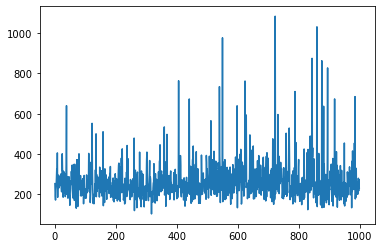

In [23]:
import matplotlib.pyplot as plt
x_axis = np.arange(0,total_episodes)
plt.plot(x_axis,total_reward_perc)

In [24]:
test["3D_return_norm"].describe()

count    3080.000000
mean        0.448847
std         0.051182
min         0.250000
25%         0.420000
50%         0.450000
75%         0.480000
max         0.720000
Name: 3D_return_norm, dtype: float64

##
First Bull Run
Start: 31 Oct 2016
End: 09 December 2018

Current Bull Run:
Start: 30th March 2020
End: Current

In [25]:
len(test)

3080

In [26]:
test["Close"][0]

696.36

In [27]:
10000/696.36

14.360388304899764

In [28]:
14.36 * 5842

83891.12

In [29]:
test["Close"].describe()

count     3080.000000
mean      5396.520078
std       3854.808755
min        685.220000
25%       1725.620000
50%       5842.085000
75%       7514.030000
max      19546.880000
Name: Close, dtype: float64

In [30]:
0/0.000001

0.0